In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import tensorflow_hub as hub
import os
from typing import Tuple

import PIL
import cv2


from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from keras import optimizers
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)
    


Number of replicas: 1


In [ ]:
print("Numpy==",np.__version__)
print("tensorflow==", tf.__version__)
print("pandas==",pd.__version__)
print("PIL==",PIL.__version__)
print('matplotlib==',matplotlib.__version__)
print('cv2==',cv2.__version__)

print("tensorflow_hub==",hub.__version__)
print("Eager mode:",tf.executing_eagerly())

print("GPU is","available" if tf.test.is_gpu_available() else"Not Available")


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Numpy== 1.21.6
tensorflow== 2.8.2
pandas== 1.3.5
PIL== 7.1.2
matplotlib== 3.2.2
cv2== 4.6.0
tensorflow_hub== 0.12.0
Eager mode: True
GPU is available


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nikhilsinghal359","key":"82fb0b959acc801eefa4ce815f2dd4e4"}'}

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import os, sys

# Create new Train and val folders

base_dir = 'drive/MyDrive/RiceLeafs/RiceLeafs'
train_path = 'drive/MyDrive/RiceLeafs/RiceLeafs/train'
val_path = 'drive/MyDrive/RiceLeafs/RiceLeafs/validation/'

column_names = os.listdir(train_path)
for i in column_names:
  os.makedirs(f'../kaggle/kaggle/output/train/{i}')
  os.makedirs(f'../kaggle/kaggle/output/validation/{i}')

out_path = '../kaggle/kaggle/output/train/'

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
from PIL import Image
def resize(input_path,folder,column_name):
    dirs = os.listdir(input_path)
    for item in dirs:
        item_path = input_path +'/' +item
        if os.path.isfile(item_path):
            #print('CHECK')
            im = Image.open(item_path)

            # Check whether the specified 
            # path exists or not 
            outpath = f'/kaggle/kaggle/output/{folder}/{column_name}'
            temp_out_path = outpath+'/'+item
            f, e = os.path.splitext(temp_out_path)

            imResize = im.resize((255,255), Image.ANTIALIAS)
            #print('CHECK 3')
            imResize.save(f + '.jpg', 'JPEG', quality=90)

In [ ]:
input_path = 'drive/MyDrive/RiceLeafs/RiceLeafs/train/Healthy'
folder = 'train'
column_name = 'Healthy'
resize(input_path,folder,column_name)

input_path = 'drive/MyDrive/RiceLeafs/RiceLeafs/train/BrownSpot'
folder = 'train'
column_name = 'BrownSpot'
resize(input_path,folder,column_name)

input_path = 'drive/MyDrive/RiceLeafs/RiceLeafs/train/Hispa'
folder = 'train'
column_name = 'Hispa'
resize(input_path,folder,column_name)

input_path = 'drive/MyDrive/RiceLeafs/RiceLeafs/train/LeafBlast'
folder = 'train'
column_name = 'LeafBlast'
resize(input_path,folder,column_name)

print('Done with train resizing')

Done with train resizing


In [ ]:
## VALIDATION
input_path = 'drive/MyDrive/RiceLeafs/RiceLeafs/validation/Healthy'
folder = 'validation'
column_name = 'Healthy'
resize(input_path,folder,column_name)

input_path = 'drive/MyDrive/RiceLeafs/RiceLeafs/validation/BrownSpot'
folder = 'validation'
column_name = 'BrownSpot'
resize(input_path,folder,column_name)

input_path = 'drive/MyDrive/RiceLeafs/RiceLeafs/validation/Hispa'
folder = 'validation'
column_name = 'Hispa'
resize(input_path,folder,column_name)

input_path = 'drive/MyDrive/RiceLeafs/RiceLeafs/validation/LeafBlast'
folder = 'validation'
column_name = 'LeafBlast'
resize(input_path,folder,column_name)

print('Done with Validation resizing')

Done with Validation resizing


In [ ]:
os.listdir('/kaggle/kaggle/output/train/BrownSpot/')

['IMG_20190420_194733.jpg',
 'IMG_20190420_190524.jpg',
 'IMG_20190420_195049.jpg',
 'IMG_3175.jpg',
 'IMG_20190420_195455.jpg',
 'IMG_20190420_195107.jpg',
 'IMG_20190424_130933.jpg',
 'IMG_20190421_200147.jpg',
 'IMG_20190424_131309.jpg',
 'IMG_20190420_194620.jpg',
 'IMG_20190420_190427.jpg',
 'IMG_20190420_194232.jpg',
 'IMG_20190420_195042.jpg',
 'IMG_20190420_190414.jpg',
 'IMG_20190420_194611.jpg',
 'IMG_20190420_193236.jpg',
 'IMG_20190421_195340.jpg',
 'IMG_3182.jpg',
 'IMG_20190421_195209.jpg',
 'IMG_20190424_134128.jpg',
 'IMG_20190420_194917.jpg',
 'IMG_20190420_191014.jpg',
 'IMG_3046.jpg',
 'IMG_3077.jpg',
 'IMG_20190420_193638.jpg',
 'IMG_20190420_194605.jpg',
 'IMG_20190420_194429.jpg',
 'IMG_20190420_190653.jpg',
 'IMG_20190420_194638.jpg',
 'IMG_20190421_195243.jpg',
 'IMG_20190420_190255.jpg',
 'IMG_20190420_190558.jpg',
 'IMG_20190420_190323.jpg',
 'IMG_20190420_194239.jpg',
 'IMG_20190420_193814.jpg',
 'IMG_20190420_194246.jpg',
 'IMG_20190421_195338.jpg',
 'IMG_20

In [ ]:
data_dir = os.path.join(os.path.dirname('/kaggle/kaggle/'), 'output')

In [ ]:
train_dir = os.path.join(data_dir, 'train')
train_BrownSpot_dir = os.path.join(train_dir, 'BrownSpot')
train_Healthy_dir = os.path.join(train_dir, 'Healthy')
train_Hispa_dir = os.path.join(train_dir, 'Hispa')
train_LeafBlast_dir = os.path.join(train_dir, 'LeafBlast')


validation_dir = os.path.join(data_dir, 'validation')
validation_BrownSpot_dir = os.path.join(validation_dir, 'BrownSpot')
validation_Healthy_dir = os.path.join(validation_dir, 'Healthy')
validation_Hispa_dir = os.path.join(validation_dir, 'Hispa')
validation_LeafBlast_dir = os.path.join(validation_dir, 'LeafBlast')

In [ ]:
train_BrownSpot_names = os.listdir(train_BrownSpot_dir)
print(train_BrownSpot_names[:10])

train_Healthy_names =  os.listdir(train_Healthy_dir)
print(train_Healthy_names[:10])

train_Hispa_names = os.listdir(train_Hispa_dir)
print(train_Hispa_names[:10])

train_LeafBlast_names =  os.listdir(train_LeafBlast_dir)
print(train_LeafBlast_names[:10])

['IMG_20190420_194733.jpg', 'IMG_20190420_190524.jpg', 'IMG_20190420_195049.jpg', 'IMG_3175.jpg', 'IMG_20190420_195455.jpg', 'IMG_20190420_195107.jpg', 'IMG_20190424_130933.jpg', 'IMG_20190421_200147.jpg', 'IMG_20190424_131309.jpg', 'IMG_20190420_194620.jpg']
['IMG_20190419_144504.jpg', 'IMG_20190419_144428.jpg', 'IMG_20190419_141153.jpg', 'IMG_20190419_172034.jpg', 'IMG_20190419_171003.jpg', 'IMG_20190424_131517.jpg', 'IMG_20190424_133756.jpg', 'IMG_20190424_131315.jpg', 'IMG_20190419_140932.jpg', 'IMG_20190419_164335.jpg']
['IMG_20190419_144742.jpg', 'IMG_20190424_130502.jpg', 'IMG_20190419_145238.jpg', 'IMG_20190420_194641.jpg', 'IMG_20190424_125708.jpg', 'IMG_20190419_170851.jpg', 'IMG_20190419_162319.jpg', 'IMG_20190419_144909.jpg', 'IMG_20190419_141015.jpg', 'IMG_20190424_125640.jpg']
['IMG_20190419_171008.jpg', 'IMG_20190419_124542.jpg', 'IMG_20190420_195006.jpg', 'IMG_20190419_170445.jpg', 'IMG_20190419_110208.jpg', 'IMG_20190419_133926.jpg', 'IMG_20190420_185715.jpg', 'IMG_201

In [ ]:

import time
import os
from os.path import exists

def count(dir, counter=0):
    "returns number of files in dir and subdirs"
    for pack in os.walk(dir):
        for f in pack[2]:
            counter += 1
    return dir + " : " + str(counter) + " files"

print('total images for training :', count(train_dir))
print('total images for validation :', count(validation_dir))

total images for training : /kaggle/kaggle/output/train : 2684 files
total images for validation : /kaggle/kaggle/output/validation : 671 files


In [ ]:
# Parameters for our graph; we'll outpu images in a 4x4 configuration
nrows = 4
ncols = 4

# for iternating over images
pic_index = 0

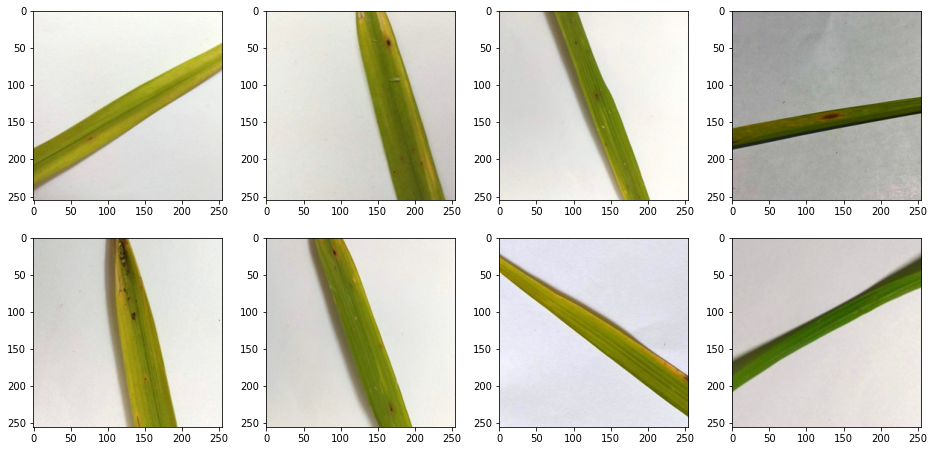

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics

fig = plt.gcf()
fig.set_size_inches(ncols *4, nrows*4)

pic_index += 8
next_BrownSpot_pix = [os.path.join(train_BrownSpot_dir, fname)
                for fname in train_BrownSpot_names[pic_index-8:pic_index]]
for i, img_path in enumerate(next_BrownSpot_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows,ncols,i +1)
  #sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

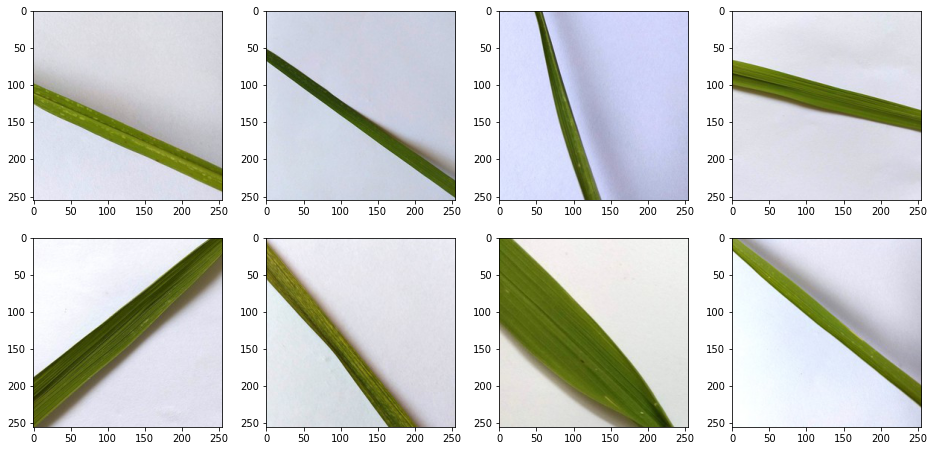

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics

fig = plt.gcf()
fig.set_size_inches(ncols *4, nrows*4)

pic_index += 8
next_Healthy_pix = [os.path.join(train_Healthy_dir, fname)
                for fname in train_Healthy_names[pic_index-8:pic_index]]


for i, img_path in enumerate(next_Healthy_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows,ncols,i +1)
  #sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

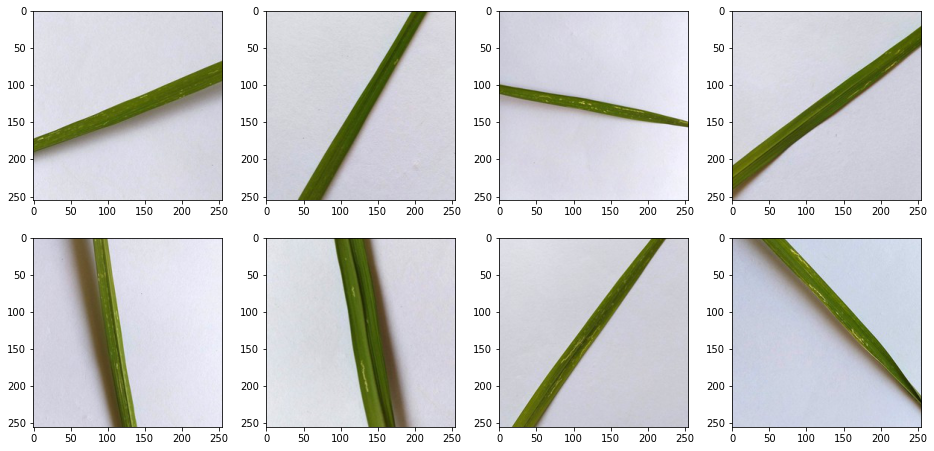

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics

fig = plt.gcf()
fig.set_size_inches(ncols *4, nrows*4)

pic_index += 8

next_Hispa_pix = [os.path.join(train_Hispa_dir, fname)
                for fname in train_Hispa_names[pic_index-8:pic_index]]


for i, img_path in enumerate(next_Hispa_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows,ncols,i +1)
  #sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

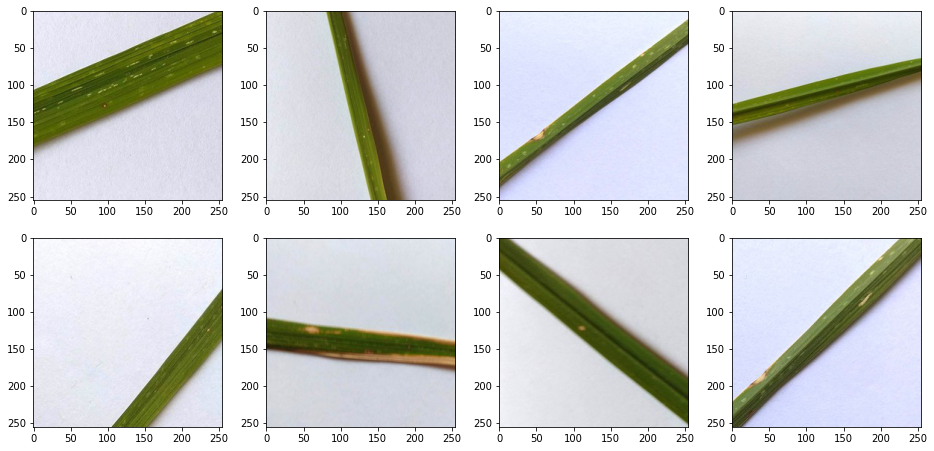

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics

fig = plt.gcf()
fig.set_size_inches(ncols *4, nrows*4)

pic_index += 8

next_LeafBlast_pix = [os.path.join(train_LeafBlast_dir, fname)
                for fname in train_LeafBlast_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_LeafBlast_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows,ncols,i +1)
  #sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,log = {}):
    if(log.get('accuracy')> 0.99):
      if(log.get('val_accuracy')>0.99):
        print("\n Reached 99% Accuracy for both train and val.")
        self.model.stop_training = True

callbacks = MyCallback()

In [ ]:
INCEPTIONV3_TFHUB = 'https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4'

In [ ]:
def load_generators_train(dataset_dir: str, image_dim: Tuple[int, int], batch_size: int):
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        dataset_dir,
        shuffle=True,
        color_mode="rgb",
        class_mode="categorical",
        target_size=image_dim,
        batch_size=batch_size)
    # it takes input images and outputs augmented images

    print('created dataset for {}'.format(dataset_dir))

    return train_generator

In [ ]:
def load_generators_val(dataset_dir: str, image_dim: Tuple[int, int], batch_size: int):
    
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    train_generator = train_datagen.flow_from_directory(
        dataset_dir,
        shuffle=False,
        color_mode="rgb",
        class_mode="categorical",
        target_size=image_dim,
        batch_size=1)
    print('created dataset for {}'.format(dataset_dir))

    return train_generator

In [ ]:
BATCH_SIZE = 24
IMG_HEIGHT = 299
IMG_WIDTH = 299

#train_dir = 'drive/MyDrive/RiceLeafs/RiceLeafs/train'
#validation_dir = 'drive/MyDrive/RiceLeafs/RiceLeafs/validation'

# load the data generators
train_datagen = load_generators_train(train_dir, (IMG_HEIGHT, IMG_WIDTH), BATCH_SIZE)

validation_datagen = load_generators_val(validation_dir, (IMG_HEIGHT, IMG_WIDTH), BATCH_SIZE)

Found 2684 images belonging to 4 classes.
created dataset for /kaggle/kaggle/output/train
Found 671 images belonging to 4 classes.
created dataset for /kaggle/kaggle/output/validation


In [ ]:
INCEPTIONV3_TFHUB = 'https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4'


In [ ]:
input_shape = (IMG_WIDTH, IMG_HEIGHT, 3)
num_classes = train_datagen.num_classes
#declaring the classes and input shape

# fetch the feature extractor from the tf_hub
feature_extractor = hub.KerasLayer(INCEPTIONV3_TFHUB, input_shape=input_shape)
#used to gather the transfer learning model

# make the feature extractor trainable
feature_extractor.trainable = True
# create the sequential model
model = tf.keras.Sequential([
    feature_extractor, 
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.Dense(num_classes, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.0005))
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.005,momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              21802784  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 21,810,980
Trainable params: 21,776,548
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
history=model.fit(
    train_datagen,
    epochs=12,
    steps_per_epoch=train_datagen.samples//train_datagen.batch_size,
    validation_data=validation_datagen)

Epoch 1/12
111/111 [==============================] - 77s 481ms/step - loss: 1.1150 - accuracy: 0.6440 - val_loss: 5.1147 - val_accuracy: 0.2534
Epoch 2/12
111/111 [==============================] - 48s 434ms/step - loss: 0.8183 - accuracy: 0.7850 - val_loss: 1.3888 - val_accuracy: 0.6334
Epoch 3/12
111/111 [==============================] - 48s 436ms/step - loss: 0.6827 - accuracy: 0.8338 - val_loss: 1.5989 - val_accuracy: 0.5902
Epoch 4/12
111/111 [==============================] - 49s 442ms/step - loss: 0.5766 - accuracy: 0.8808 - val_loss: 1.0024 - val_accuracy: 0.7750
Epoch 5/12
111/111 [==============================] - 50s 447ms/step - loss: 0.5035 - accuracy: 0.9064 - val_loss: 1.1618 - val_accuracy: 0.7779
Epoch 6/12
111/111 [==============================] - 49s 440ms/step - loss: 0.4528 - accuracy: 0.9241 - val_loss: 1.6538 - val_accuracy: 0.6662
Epoch 7/12
111/111 [==============================] - 50s 448ms/step - loss: 0.4543 - accuracy: 0.9259 - val_loss: 1.1729 - val_ac

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
Y_pred = model.predict(validation_datagen)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
matrix=confusion_matrix(validation_datagen.classes, y_pred)
print(matrix)

Confusion Matrix
[[ 80   7   5  13]
 [  1 272   3  21]
 [  0  17  81  15]
 [ 10   4   9 133]]


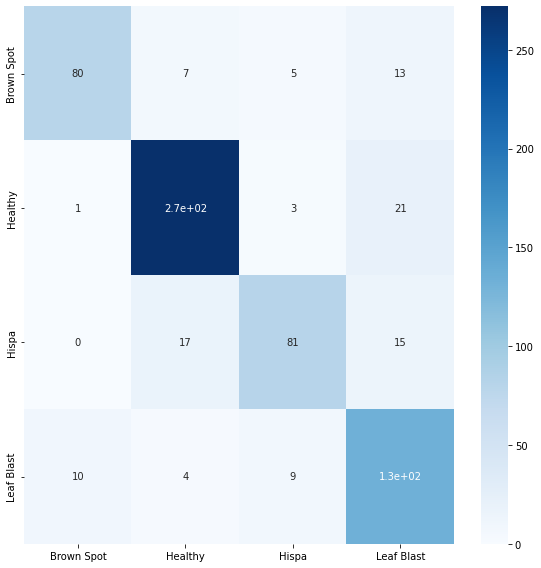

In [ ]:
import matplotlib.pyplot as plt 
labels=['Brown Spot','Healthy','Hispa','Leaf Blast']
import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(matrix,annot=True,cmap=plt.cm.Blues,xticklabels=labels,yticklabels=labels)
plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
model = tf.keras.Sequential([
hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),

  tf.keras.layers.Dense(train_datagen.num_classes, activation='softmax')
])

model.build([None, 244, 244, 3])

In [ ]:
#Compile model specifying the optimizer learning rate

LEARNING_RATE = 0.0001 #@param {type:"number"}

model.compile(
   optimizer=tf.keras.optimizers.SGD(learning_rate=0.005,momentum=0.9),
   loss='categorical_crossentropy',
   metrics=['accuracy'])

In [ ]:
EPOCHS=10 #@param {type:"integer"}

history = model.fit_generator(
        train_datagen,
        steps_per_epoch=train_datagen.samples//train_datagen.batch_size,
        epochs=EPOCHS,
        validation_data=validation_datagen,
        #callbacks = [callbacks],
        validation_steps=validation_datagen.samples//validation_datagen.batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/10
111/111 [==============================] - 131s 838ms/step - loss: 1.0009 - accuracy: 0.5959 - val_loss: 1.0124 - val_accuracy: 0.5857
Epoch 2/10
111/111 [==============================] - 87s 783ms/step - loss: 0.7662 - accuracy: 0.6902 - val_loss: 0.9005 - val_accuracy: 0.6244
Epoch 3/10
111/111 [==============================] - 86s 777ms/step - loss: 0.7021 - accuracy: 0.7222 - val_loss: 0.8779 - val_accuracy: 0.6274
Epoch 4/10
111/111 [==============================] - 86s 780ms/step - loss: 0.6527 - accuracy: 0.7391 - val_loss: 0.8868 - val_accuracy: 0.6468
Epoch 5/10
111/111 [==============================] - 86s 776ms/step - loss: 0.6388 - accuracy: 0.7538 - val_loss: 1.0119 - val_accuracy: 0.6215
Epoch 6/10
111/111 [==============================] - 86s 774ms/step - loss: 0.6060 - accuracy: 0.7609 - val_loss: 0.7787 - val_accuracy: 0.6975
Epoch 7/10
111/111 [==============================] - 86s 774ms/step - loss: 0.5969 - accuracy: 0.7718 - val_loss: 0.8164 - val_a

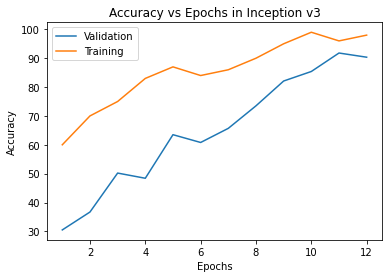

In [ ]:
# importing the required module
import matplotlib.pyplot as plt
  
# x axis values
x1 = [1,2,3,4,5,6,7,8,9,10,11,12]
# corresponding y axis values
y1 = [30.5,36.7,50.2,48.4,63.5,60.8,65.7,73.5,82.1,85.4,91.8,90.35]
  
# plotting the points 
plt.plot(x1, y1,label='Validation')
x2=[1,2,3,4,5,6,7,8,9,10,11,12]
y2=[60,70,75,83,87,84,86,90,95,99,96,98]
plt.plot(x2,y2,label='Training')
  
# naming the x axis
plt.xlabel('Epochs')
# naming the y axis
plt.ylabel('Accuracy')

# giving a title to my graph
plt.title('Accuracy vs Epochs in Inception v3')
plt.legend()
# function to show the plot
plt.show()

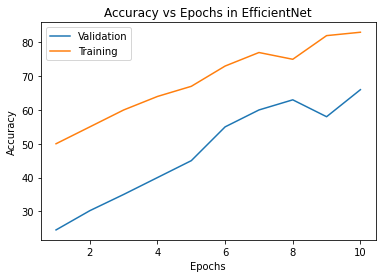

In [ ]:
# importing the required module
import matplotlib.pyplot as plt
  
# x axis values
x1 = [1,2,3,4,5,6,7,8,9,10]
# corresponding y axis values
y1 = [24.5,30.2,35,40,45,55,60,63,58,66]
  
# plotting the points 
plt.plot(x1, y1,label='Validation')
x2=[1,2,3,4,5,6,7,8,9,10]
y2=[50,55,60,64,67,73,77,75,82,83]
plt.plot(x2,y2,label='Training')
  
# naming the x axis
plt.xlabel('Epochs')
# naming the y axis
plt.ylabel('Accuracy')

# giving a title to my graph
plt.title('Accuracy vs Epochs in EfficientNet')
plt.legend()
# function to show the plot
plt.show()

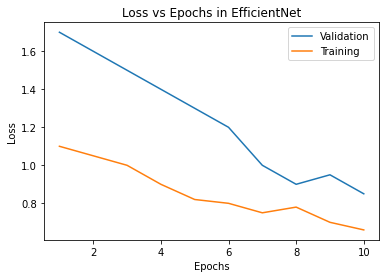

In [ ]:
# importing the required module
import matplotlib.pyplot as plt
  
# x axis values
x1 = [1,2,3,4,5,6,7,8,9,10]
# corresponding y axis values
#y1 = [24.5,30.2,35,40,45,55,60,63,58,66]
y1=[1.7,1.6,1.5,1.4,1.3,1.2,1,0.9,0.95,0.85]
  
# plotting the points 
plt.plot(x1, y1,label='Validation')
x2=[1,2,3,4,5,6,7,8,9,10]
y2=[50,55,60,64,67,73,77,75,82,83]
y2=[1.1,1.05,1,0.9,0.82,0.8,0.75,0.78,0.7,0.66]
plt.plot(x2,y2,label='Training')
  
# naming the x axis
plt.xlabel('Epochs')
# naming the y axis
plt.ylabel('Loss')

# giving a title to my graph
plt.title('Loss vs Epochs in EfficientNet')
plt.legend()
# function to show the plot
plt.show()

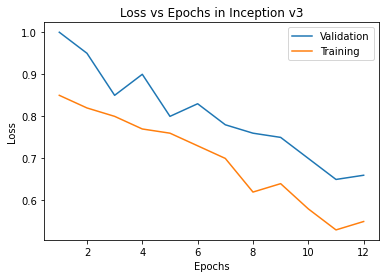

In [ ]:
# importing the required module
import matplotlib.pyplot as plt
  
# x axis values
x1 = [1,2,3,4,5,6,7,8,9,10,11,12]
# corresponding y axis values
y1 = [1,0.95,0.85,0.9,0.8,0.83,0.78,0.76,0.75,0.7,0.65,0.66]
  
# plotting the points 
plt.plot(x1, y1,label='Validation')
x2=[1,2,3,4,5,6,7,8,9,10,11,12]
y2=[0.85,0.82,0.8,0.77,0.76,0.73,0.7,0.62,0.64,0.58,0.53,0.55]
plt.plot(x2,y2,label='Training')
  
# naming the x axis
plt.xlabel('Epochs')
# naming the y axis
plt.ylabel('Loss')

# giving a title to my graph
plt.title('Loss vs Epochs in Inception v3')
plt.legend()
# function to show the plot
plt.show()